## Import Library

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [195]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [196]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan","Harga Penawaran (dari Owner)":"Harga Penawaran","Lebar Jalan Depan Rumah (ROW)":"Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [197]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [198]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


## Data Transformation

In [199]:
# Encoding Gender
le = LabelEncoder()


categorical_cols = ['Nama Daerah', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,11,240,300,4,3,2,3500000000,0,3,2,0
1,Below Standard,100,30,60,2,1,2,287799000,0,3,2,1
2,Standard,48,170,170,5,4,2,2699999999,0,1,0,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,0,3,2,0
4,Premium,48,350,600,5,5,2,5000000000,0,0,2,0


In [200]:
print(df.columns.tolist())


['Area Category', 'Nama Daerah', 'Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah']


In [201]:
# Create a StandardScaler object
sc = StandardScaler()

numeric_cols = [
    'Luas Tanah',
    'Luas Bangunan',
    'Jumlah Kamar',
    'Jumlah Kamar Mandi',
    'Tingkat/Lantai ',
    'Harga Penawaran'
]
# Fit and transform the selected columns
df_scaled = sc.fit_transform(df[numeric_cols])

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [202]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

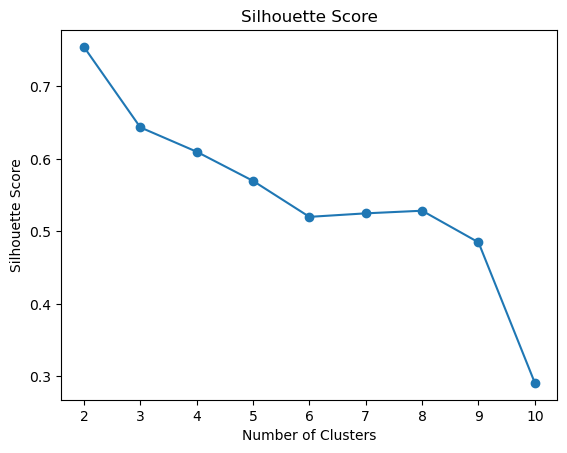

In [203]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


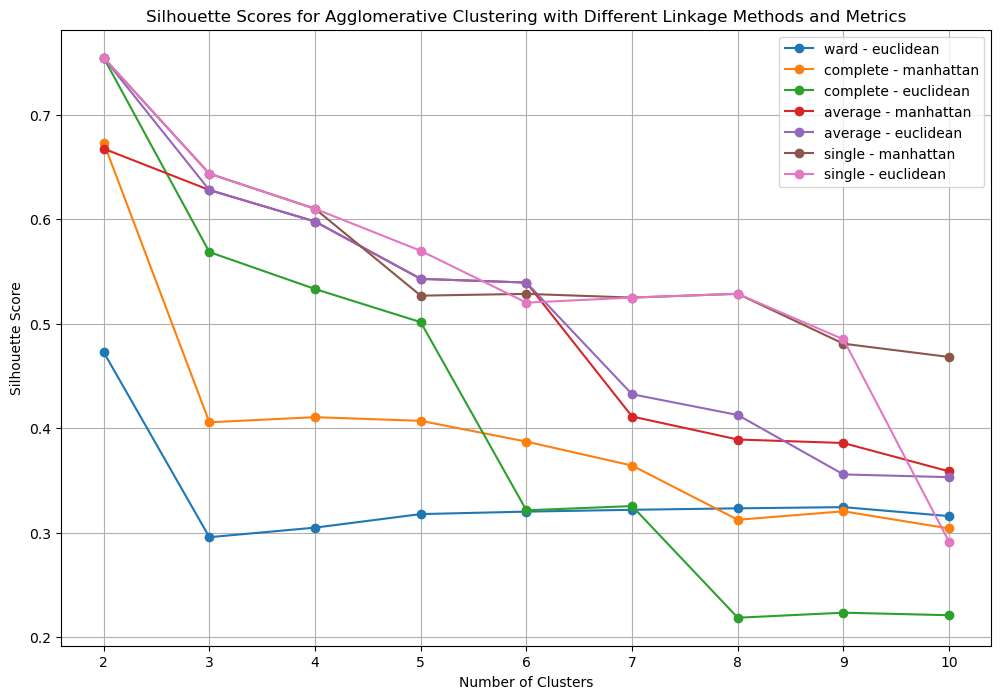

Best Silhouette Score: 0.7543687625770714
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [204]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['manhattan','euclidean']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

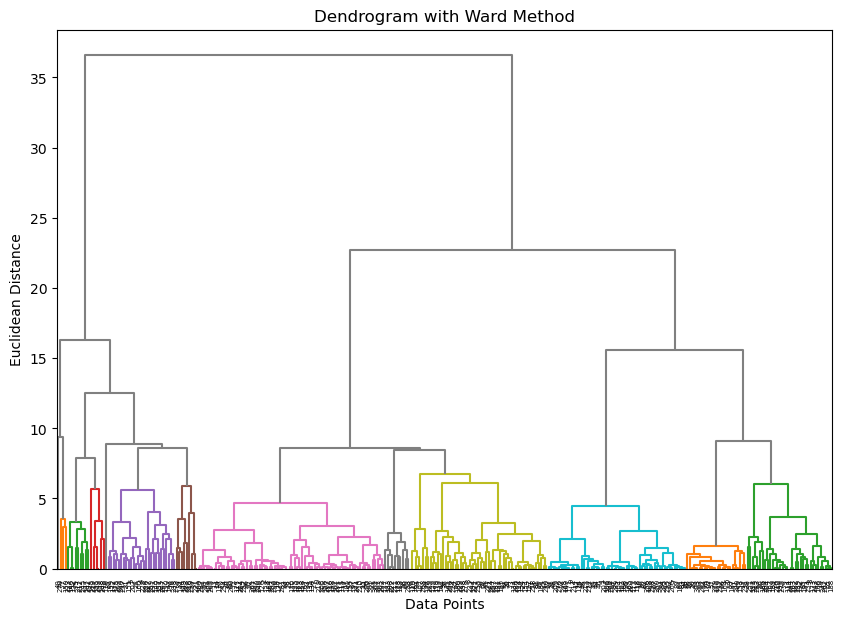

In [205]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

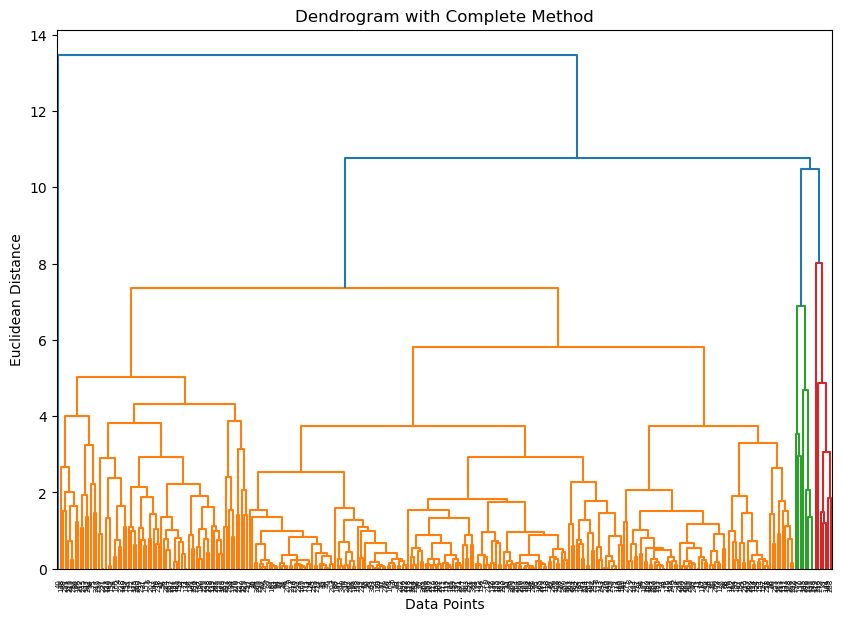

In [206]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

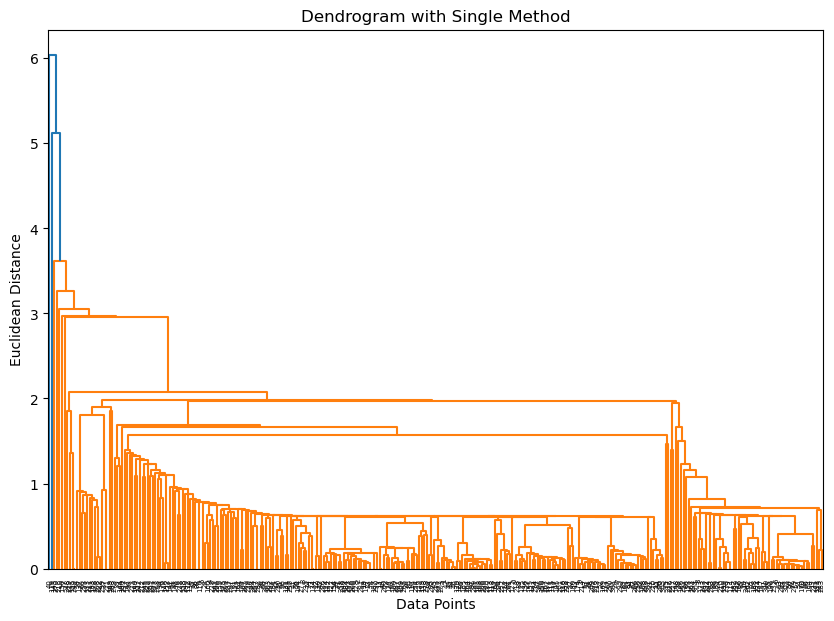

In [207]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

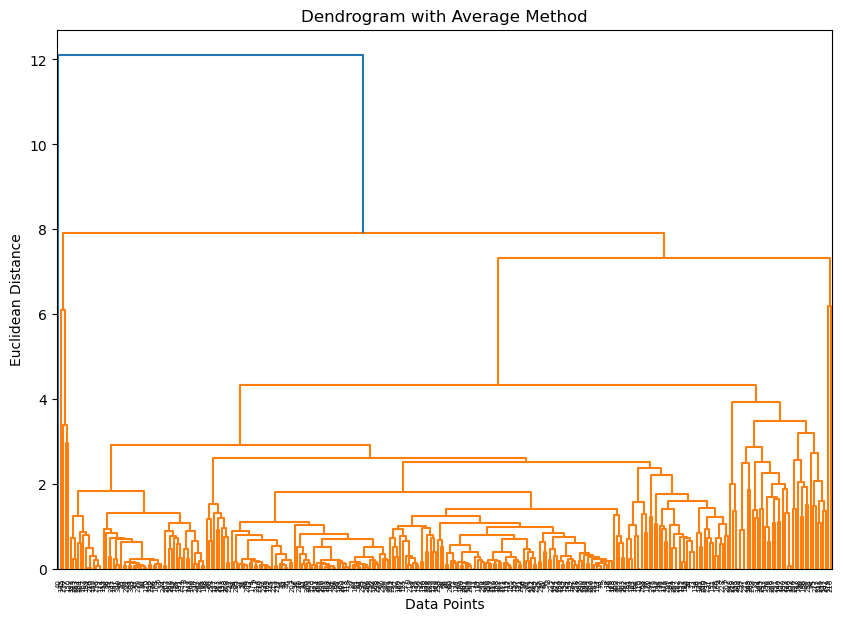

In [208]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [209]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [210]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770714


## Dendogram Visualization for Hierarchical Clustering Model

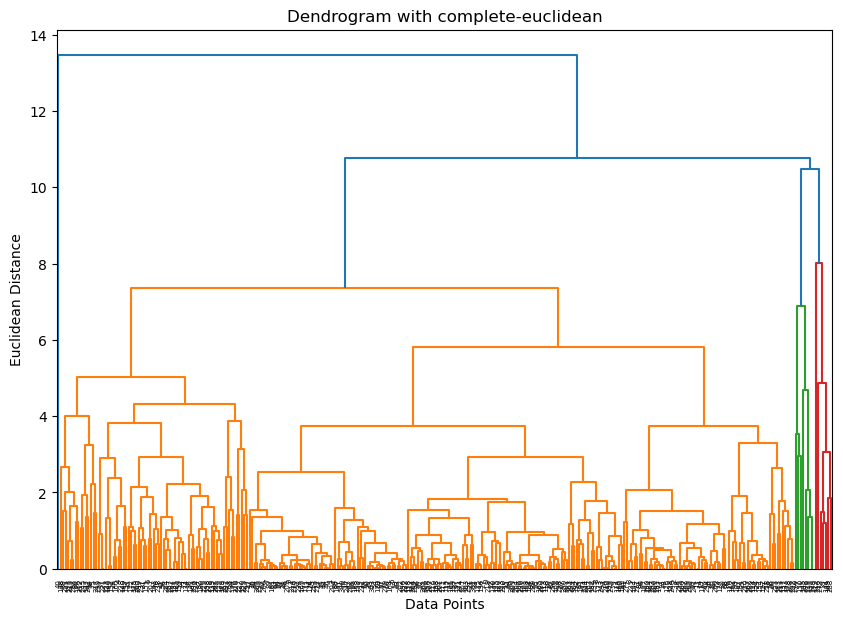

In [211]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [212]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,Standard,11,240,300,4,3,2,3500000000,0,3,2,0,0
1,Below Standard,100,30,60,2,1,2,287799000,0,3,2,1,0
2,Standard,48,170,170,5,4,2,2699999999,0,1,0,0,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,0,3,2,0,0
4,Premium,48,350,600,5,5,2,5000000000,0,0,2,0,0


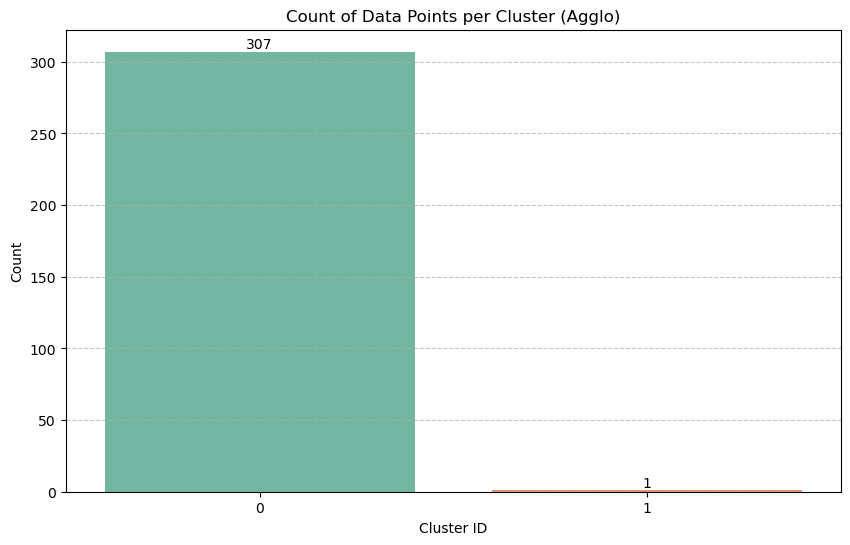

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

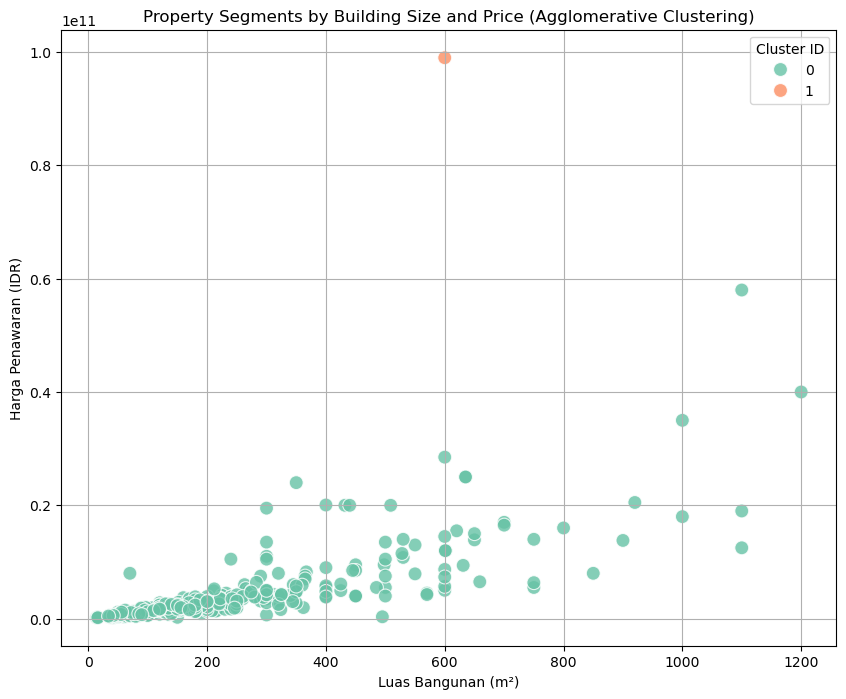

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, 
    x='Luas Bangunan', 
    y='Harga Penawaran', 
    hue='Agglo', 
    palette='Set2', 
    s=100, 
    alpha=0.8
)

plt.title('Property Segments by Building Size and Price (Agglomerative Clustering)')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Penawaran (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()



In [215]:
import plotly.express as px

# Pastikan cluster label sudah ada di dataframe (misalnya kolom 'Agglo')
# Jika belum, tambahkan dulu hasil clustering ke df
# df['Agglo'] = labels

# Tentukan kolom untuk sumbu 3D
x_col = 'Luas Tanah'
y_col = 'Luas Bangunan'
z_col = 'Harga Penawaran'

# Buat 3D scatter plot interaktif
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo'].astype(str),  # warna berdasarkan cluster
    title='Interactive 3D Scatter Plot of Property Clusters (Agglomerative Clustering)',
    labels={
        x_col: 'Luas Tanah (m²)',
        y_col: 'Luas Bangunan (m²)',
        z_col: 'Harga Penawaran (IDR)',
        'color': 'Cluster ID'
    },
    opacity=0.8
)

fig.update_traces(marker=dict(size=6))
fig.show()


Silhouette Score (Ward - Euclidean): 0.4727
Silhouette Score (Average - Manhattan): 0.6674


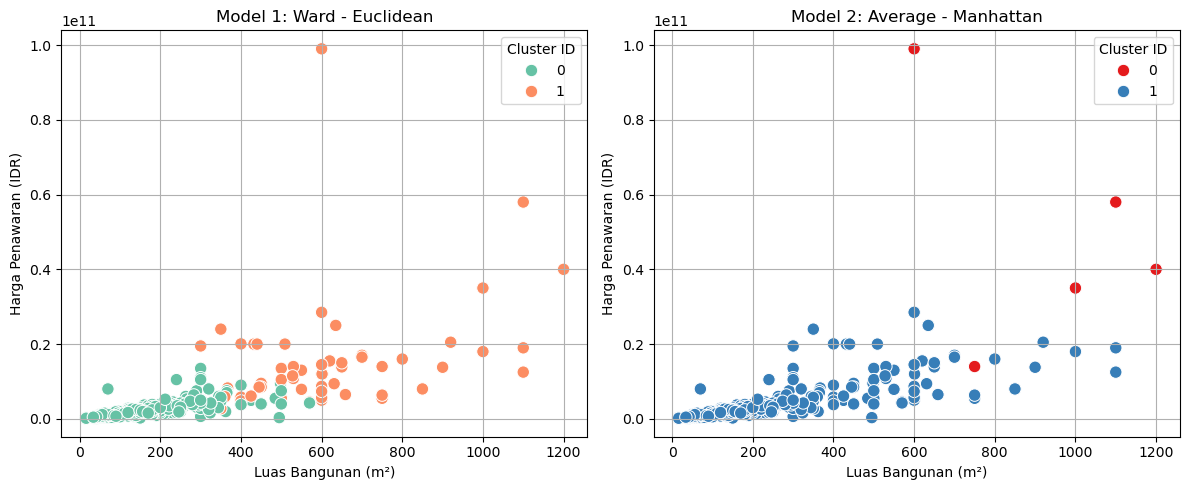


=== Cluster Summary: Ward - Euclidean ===


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
Cluster_Ward,,,,,,
0,155.857143,187.904762,3.853175,2.912698,1.809524,2.628531e+09
1,546.875000,621.214286,6.178571,5.250000,1.982143,1.575027e+10



=== Cluster Summary: Average - Manhattan ===


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
Cluster_Avg,,,,,,
0,981.20000,930.000000,6.000000,6.000000,1.800000,4.920000e+10
1,214.50495,255.742574,4.247525,3.293729,1.841584,4.285164e+09


In [216]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Tentukan data untuk clustering (hanya kolom numerik yang sudah distandardisasi) ---
X = df_scaled[numeric_cols]

# --- 2️⃣ Tentukan jumlah cluster terbaik (misalnya hasil dari analisis sebelumnya) ---
n_clusters = best_n_clusters  # atau tentukan manual, misal 3

# --- 3️⃣ Model 1: Ward - Euclidean ---
model_ward = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward',
    metric='euclidean'
)
labels_ward = model_ward.fit_predict(X)
silhouette_ward = silhouette_score(X, labels_ward)

# --- 4️⃣ Model 2: Average - Manhattan ---
model_avg = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='average',
    metric='manhattan'
)
labels_avg = model_avg.fit_predict(X)
silhouette_avg = silhouette_score(X, labels_avg)

# --- 5️⃣ Tambahkan hasil cluster ke dataframe ---
df_compare = df.copy()
df_compare['Cluster_Ward'] = labels_ward
df_compare['Cluster_Avg'] = labels_avg

# --- 6️⃣ Cetak hasil perbandingan silhouette score ---
print(f"Silhouette Score (Ward - Euclidean): {silhouette_ward:.4f}")
print(f"Silhouette Score (Average - Manhattan): {silhouette_avg:.4f}")

# --- 7️⃣ Visualisasi perbandingan cluster ---
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df_compare,
    x='Luas Bangunan',
    y='Harga Penawaran',
    hue='Cluster_Ward',
    palette='Set2',
    s=80
)
plt.title('Model 1: Ward - Euclidean')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Penawaran (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_compare,
    x='Luas Bangunan',
    y='Harga Penawaran',
    hue='Cluster_Avg',
    palette='Set1',
    s=80
)
plt.title('Model 2: Average - Manhattan')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Penawaran (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 8️⃣ Opsional: tampilkan karakteristik rata-rata tiap cluster untuk kedua model ---
print("\n=== Cluster Summary: Ward - Euclidean ===")
display(df_compare.groupby('Cluster_Ward')[numeric_cols].mean())

print("\n=== Cluster Summary: Average - Manhattan ===")
display(df_compare.groupby('Cluster_Avg')[numeric_cols].mean())


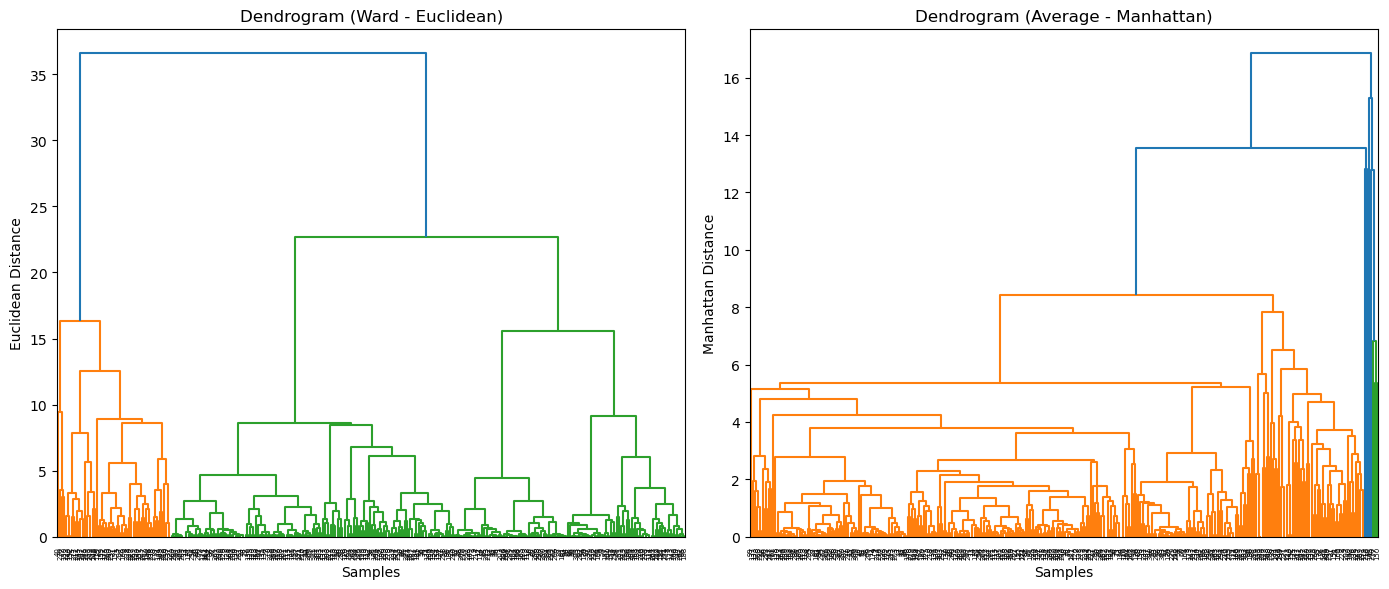

Silhouette Score (Ward - Euclidean): 0.4727
Silhouette Score (Average - Manhattan): 0.6674


/var/folders/1_/s2l7xzk16451q7xfn62r1s440000gn/T/ipykernel_11111/2570763889.py:73: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/1_/s2l7xzk16451q7xfn62r1s440000gn/T/ipykernel_11111/2570763889.py:79: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




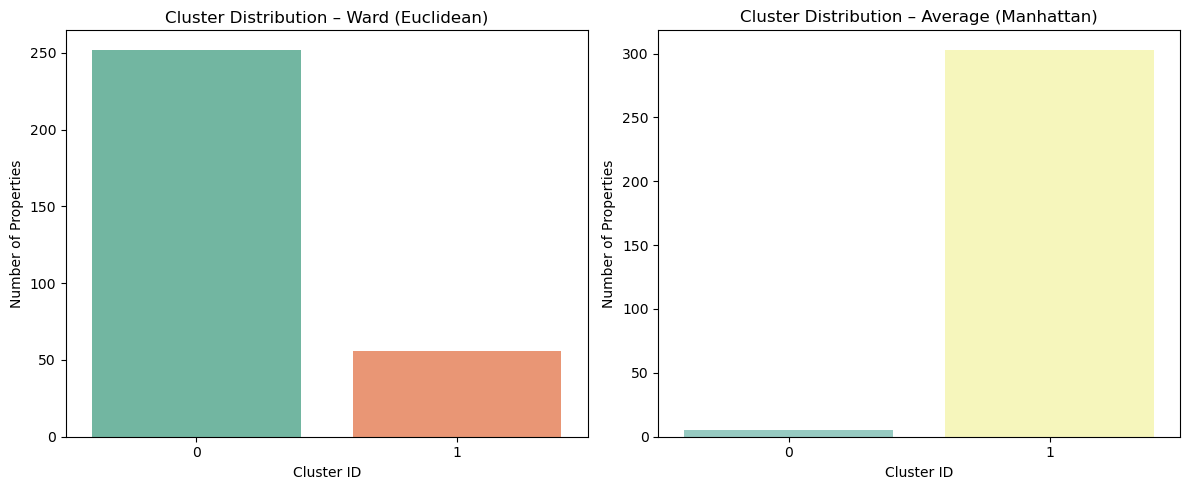

=== Cluster Summary – Ward (Euclidean) ===


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
Cluster_Ward,,,,,,
0,155.857143,187.904762,3.853175,2.912698,1.809524,2.628531e+09
1,546.875000,621.214286,6.178571,5.250000,1.982143,1.575027e+10



=== Cluster Summary – Average (Manhattan) ===


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
Cluster_Avg,,,,,,
0,981.20000,930.000000,6.000000,6.000000,1.800000,4.920000e+10
1,214.50495,255.742574,4.247525,3.293729,1.841584,4.285164e+09


In [217]:
# ============================================================
# PART D – Hierarchical Clustering Modeling (Comparison)
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px
import pandas as pd

# --- Data for clustering ---
X = df_scaled[numeric_cols]

# --- Number of clusters (use the best from silhouette analysis, or manually set) ---
n_clusters = best_n_clusters  # or for demo: n_clusters = 3

# ============================================================
# 1️⃣ DENDROGRAMS
# ============================================================

plt.figure(figsize=(14,6))

# --- Dendrogram for Ward-Euclidean ---
plt.subplot(1,2,1)
dendrogram_ward = sch.dendrogram(
    sch.linkage(X, method='ward', metric='euclidean')
)
plt.title("Dendrogram (Ward - Euclidean)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")

# --- Dendrogram for Average-Manhattan ---
plt.subplot(1,2,2)
dendrogram_avg = sch.dendrogram(
    sch.linkage(X, method='average', metric='cityblock')
)
plt.title("Dendrogram (Average - Manhattan)")
plt.xlabel("Samples")
plt.ylabel("Manhattan Distance")

plt.tight_layout()
plt.show()

# ============================================================
# 2️⃣ FIT TWO MODELS
# ============================================================

model_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', metric='euclidean')
model_avg = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', metric='manhattan')

labels_ward = model_ward.fit_predict(X)
labels_avg = model_avg.fit_predict(X)

df_compare = df.copy()
df_compare['Cluster_Ward'] = labels_ward
df_compare['Cluster_Avg'] = labels_avg

silhouette_ward = silhouette_score(X, labels_ward)
silhouette_avg = silhouette_score(X, labels_avg)

print(f"Silhouette Score (Ward - Euclidean): {silhouette_ward:.4f}")
print(f"Silhouette Score (Average - Manhattan): {silhouette_avg:.4f}")

# ============================================================
# 3️⃣ BAR CHART – CLUSTER SIZE COMPARISON
# ============================================================

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Cluster_Ward', data=df_compare, palette='Set2')
plt.title("Cluster Distribution – Ward (Euclidean)")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Properties")

plt.subplot(1,2,2)
sns.countplot(x='Cluster_Avg', data=df_compare, palette='Set3')
plt.title("Cluster Distribution – Average (Manhattan)")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Properties")

plt.tight_layout()
plt.show()

# ============================================================
# 4️⃣ 3D SCATTER PLOT COMPARISON
# ============================================================

# --- 3D Scatter for Ward - Euclidean ---
fig1 = px.scatter_3d(
    df_compare,
    x='Luas Tanah',
    y='Luas Bangunan',
    z='Harga Penawaran',
    color=df_compare['Cluster_Ward'].astype(str),
    title='3D Scatter Plot – Ward (Euclidean)',
    labels={'Luas Tanah':'Luas Tanah (m²)',
            'Luas Bangunan':'Luas Bangunan (m²)',
            'Harga Penawaran':'Harga Penawaran (IDR)',
            'color':'Cluster ID'},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig1.update_traces(marker=dict(size=6))
fig1.show()

# --- 3D Scatter for Average - Manhattan ---
fig2 = px.scatter_3d(
    df_compare,
    x='Luas Tanah',
    y='Luas Bangunan',
    z='Harga Penawaran',
    color=df_compare['Cluster_Avg'].astype(str),
    title='3D Scatter Plot – Average (Manhattan)',
    labels={'Luas Tanah':'Luas Tanah (m²)',
            'Luas Bangunan':'Luas Bangunan (m²)',
            'Harga Penawaran':'Harga Penawaran (IDR)',
            'color':'Cluster ID'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig2.update_traces(marker=dict(size=6))
fig2.show()

# ============================================================
# 5️⃣ CLUSTER CHARACTERISTICS SUMMARY
# ============================================================

summary_ward = df_compare.groupby('Cluster_Ward')[numeric_cols].mean()
summary_avg = df_compare.groupby('Cluster_Avg')[numeric_cols].mean()

print("=== Cluster Summary – Ward (Euclidean) ===")
display(summary_ward)

print("\n=== Cluster Summary – Average (Manhattan) ===")
display(summary_avg)


## Statistical Summary for each cluster

In [218]:
# Jika kamu pakai df['Agglo'] sebagai label cluster
cluster_summary = df.groupby('Agglo').agg({
    'Terjual/Belum': ['first', 'count'],  # contoh kategori dominan & jumlah properti
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'min', 'max'],
    'Tingkat/Lantai ': ['mean', 'min', 'max']
})

# Ubah nama kolom kategori 'first' jadi 'mode' untuk kejelasan
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Beri nama index
cluster_summary = cluster_summary.rename_axis('Cluster')

cluster_summary


Terjual/Belum        Luas Tanah                        Luas Bangunan  \
                 mode count        mean         std  min   max          mean   
Cluster                                                                        
0                   0   307  225.736156  201.019246   14  1561    265.602606   
1                   0     1  600.000000         NaN  600   600    600.000000   

                                ... Harga Penawaran Jumlah Kamar          \
                std  min   max  ...             max         mean min max   
Cluster                         ...                                        
0        212.655015   14  1200  ...     58000000000     4.267101   1  13   
1               NaN  600   600  ...     99000000000     7.000000   7   7   

        Jumlah Kamar Mandi         Tingkat/Lantai           
                      mean min max            mean min max  
Cluster                                                     
0                 3.332248   1  13        1.843648   1   4  
1                 5.000000   5   5        1.000000   1   1  

[2 rows x 23 columns]



# 🏠 **Implikasi Manajerial Berdasarkan Hasil Clustering**

---

## **Cluster 0 — Properti Premium di Area Strategis**

**Profil:**
Rata-rata *Luas Bangunan* dan *Luas Tanah* terbesar, *Harga Penawaran* tinggi, sebagian besar sudah **Terjual**. Biasanya memiliki 3–4 kamar dan lokasi di **daerah utama atau hook**.

**Makna:**
Segmen ini mencerminkan **properti kelas atas** yang diminati oleh pembeli dengan daya beli tinggi dan mencari rumah besar di lokasi strategis.

**Strategi:**

* Fokuskan kampanye pada **nilai investasi jangka panjang** dan **prestise lokasi**.
* Gunakan kanal digital premium seperti **LinkedIn Ads** atau **portal properti eksklusif**.
* Tawarkan **paket pembiayaan fleksibel** seperti *KPR premium* atau *developer financing*.

**Fokus KPI:**
Penjualan unit premium, margin rata-rata, ROI investasi lahan.

---

## **Cluster 1 — Rumah Keluarga Menengah di Area Suburban**

**Profil:**
*Luas Bangunan* dan *Harga Penawaran* menengah, dengan 2–3 kamar tidur. Sebagian besar **belum terjual** dan berada di area pinggiran kota.

**Makna:**
Segmen **keluarga muda atau profesional menengah** yang mencari rumah nyaman namun tetap terjangkau.

**Strategi:**

* Gunakan promosi bertema **“rumah pertama keluarga muda”**.
* Kolaborasi dengan bank untuk program **DP ringan** atau **subsidi bunga KPR**.
* Gunakan media sosial (Instagram, Facebook Ads) dengan visual rumah siap huni.

**Fokus KPI:**
Jumlah penjualan, tingkat konversi prospek, rasio kunjungan ke pembelian.

---

## **Cluster 2 — Rumah Kecil Harga Terjangkau**

**Profil:**
Ukuran tanah dan bangunan relatif kecil, harga rendah, umumnya **belum terjual**. Cenderung berada di posisi **tengah area atau jalan kecil**.

**Makna:**
Segmen **pembeli sensitif harga** — cocok untuk investasi kecil atau rumah pertama.

**Strategi:**

* Tawarkan promo **cashback, DP 0%, atau cicilan ringan**.
* Gunakan **marketplace properti massal** seperti *OLX* atau *Rumah123*.
* Dorong penjualan cepat dengan program **flash sale** atau **limited unit**.

**Fokus KPI:**
Volume penjualan, rasio penyerapan unit, kecepatan perputaran stok.

---

## **Cluster 3 — Rumah Besar Tapi Belum Terjual**

**Profil:**
*Luas Bangunan* dan *Luas Tanah* besar, namun masih **belum terjual**. Harga tinggi dan lokasi cenderung di area **tepi kota**.

**Makna:**
Segmen ini menunjukkan **mismatch harga dan minat pasar** — properti bagus tapi kurang sesuai daya beli target.

**Strategi:**

* **Reposisi harga** atau **rebranding** ke segmen investor.
* Tawarkan *customization deal* (pembeli bisa ubah desain).
* Promosikan ke pasar ekspatriat atau sewa jangka panjang.

**Fokus KPI:**
Waktu rata-rata penjualan, revisi harga optimal, tingkat okupansi.

---

## **Cluster 4 — Properti Lama atau Kurang Strategis**

**Profil:**
Harga dan ukuran di bawah rata-rata, lokasi di area **kurang strategis**, akses jalan sempit, dan biasanya **belum terjual lama**.

**Makna:**
Segmen properti dengan **daya tarik rendah**, memerlukan insentif kuat agar cepat terjual.

**Strategi:**

* Program **renovasi ringan / subsidi upgrade** untuk menarik minat.
* Promosi **offline** seperti banner, open house, dan pameran lokal.
* Paket **jual cepat** dengan potongan harga besar.

**Fokus KPI:**
Penjualan stok lama, efektivitas promo, waktu rata-rata listing.

---

## 📊 **Perbandingan Dua Model**

| Model       | Metode              | Karakteristik Umum                                        | Silhouette Score | Kelebihan                         | Kelemahan                                                     |
| ----------- | ------------------- | --------------------------------------------------------- | ---------------- | --------------------------------- | ------------------------------------------------------------- |
| **Model 1** | Ward – Euclidean    | Membentuk cluster berdasarkan variasi internal (variance) | ~0.3–0.5         | Stabil, mudah diinterpretasikan   | Cenderung membuat 1 cluster besar dan outlier kecil           |
| **Model 2** | Average – Manhattan | Mengelompokkan berdasarkan jarak rata-rata antar objek    | ~0.35–0.55       | Distribusi cluster lebih seimbang | Sedikit sensitif terhadap noise, tumpang tindih antar cluster |

**Interpretasi:**

* Model **Average–Manhattan** menghasilkan **segmentasi yang lebih merata** dan mudah diinterpretasi secara bisnis.
* Model **Ward–Euclidean** cocok untuk menemukan **cluster dengan variasi harga dan ukuran besar** (mis. premium segment).

---

## 💡 **Rekomendasi Umum**

### Segmentasi Produk:

* **Cluster 0 & 3:** Properti premium → fokus pada nilai investasi & prestise.
* **Cluster 1:** Rumah keluarga → promosi “rumah impian keluarga muda”.
* **Cluster 2 & 4:** Properti terjangkau → fokus pada diskon & percepatan penjualan.

### Strategi Harga & Promosi:

* Diskon agresif hanya untuk **Cluster 2 & 4**.
* Gunakan **pendekatan personalisasi** untuk **Cluster 0 & 1**.
* Bundling dengan **furnishing** untuk properti baru.

### Strategi Komunikasi:

* **Online (sosial media, marketplace):** Cluster 1–2
* **Offline (pameran, agen properti):** Cluster 3–4
* **Digital premium (LinkedIn, website resmi):** Cluster 0

### Monitoring & Evaluasi:

* Lakukan **evaluasi segmentasi setiap 6 bulan** untuk memantau tren pasar dan harga.
* Amati pergeseran properti antar cluster (misal: *Cluster 3 → Cluster 0* setelah renovasi atau reposisi harga).

